In [37]:
######################################### Load Libraries and Data #########################################

# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

# Import necessary libraries and modules 
# Matplotlib inline allows the output of plotting commands will be displayed inline
%matplotlib inline                      
from sklearn import linear_model        # The sklearn.linear_model module implements generalized linear models. LR is part of this module
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

col_names = ["ID", "Diagnosis", "M_Radius", "M_Texture", "M_Perimeter", "M_Area", "M_Smoothness", "M_Compactness", "M_Concavity",
            "M_Concave_Points", "M_Symmetry","M_FDimension","SE_Radius", "SE_Texture", "SE_Perimeter", "SE_Area", "SE_Smoothness", 
            "SE_Compactness", "SE_Concavity","SE_Concave_Points", "SE_Symmetry","SE_FDimension", "W_Radius", "W_Texture", 
            "W_Perimeter", "W_Area", "W_Smoothness", "W_Compactness", "W_Concavity","W_Concave_Points", "W_Symmetry",
            "W_FDimension"]

cancerdata= pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', names = col_names)

replace_str = {"Diagnosis" : {"M": 1, "B": 0}}
cancerdata.replace(replace_str, inplace=True)

#Specify Targets and Attributes#
X = cancerdata.values[:, 2:31]          
y = cancerdata.values[:,1] 

attributes = cancerdata.columns
attributes = attributes.drop(["Diagnosis","ID"])



cancerdata.describe()

,ID,Diagnosis,M_Radius,M_Texture,M_Perimeter,M_Area,M_Smoothness,M_Compactness,M_Concavity,M_Concave_Points,...,W_Radius,W_Texture,W_Perimeter,W_Area,W_Smoothness,W_Compactness,W_Concavity,W_Concave_Points,W_Symmetry,W_FDimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [78]:
############################### Import Libraries & Modules #################################
from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
# GridSearchCV performs an exhaustive search over specified parameter values for an estimator
# The parameters of the estimator used to apply these methods are optimized by cross-validated 
# grid-search over a parameter grid.
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score #http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

np.random.seed(42) # Ensure reproducability

################################# Nested Cross-Validation #################################

##################################### Parameter Tuning ####################################

# Exhaustive search over specified parameter values for an estimator.
# GridSearchCV implements a “fit” and a “score” method. 
# It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” 
# if they are implemented in the estimator used.

# The parameters of the estimator used to apply these methods are optimized by cross-validated 
# grid-search over a parameter grid.

inner_cv = KFold(n_splits=5, shuffle=True, random_state = 42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state = 42)

In [81]:
############################## Decision Tree Parameter Tuning ##############################

# Choosing optimal depth of the tree
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
                             'max_features' : [1,2,3,4,5,6,None], 
                               'min_impurity_decrease': [.1,.05,.001,.005,.0001,.0005]}],
                  scoring='recall', # Specifying multiple metrics for evaluation
                  cv=inner_cv)

gs = gs.fit(X,y)
print(" Parameter Tuning #1")
print("Non-nested CV Recall: ", gs.best_score_)
print("Optimal Parameter: ", gs.best_params_)    # Parameter setting that gave the best results on the hold out data.
print("Optimal Estimator: ", gs.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs = cross_val_score(gs, X=X, y=y, cv=outer_cv)
print("Nested CV Recall: ",nested_score_gs.mean(), " +/- ", nested_score_gs.std())

# See all the parameters you can optimize here http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Choosing optimal depth of the tree AND optimal splitting criterion
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion':['gini','entropy'], 'splitter' : ["best", 'random']}],
                  scoring='recall',
                  cv=inner_cv)

gs_dt = gs_dt.fit(X,y)
print("\n Parameter Tuning #2")
print("Non-nested CV Recall: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt = cross_val_score(gs_dt, X=X, y=y, cv=outer_cv)
print("Nested CV Recall: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

# Choosing depth of the tree AND splitting criterion AND min_samples_leaf AND min_samples_split
gs_dt2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5],
                              'min_samples_split':[2,3,4,5], 
                              'max_leaf_nodes':[2,4,6,8,10,None]}],
                  scoring='recall',
                  cv=inner_cv,
                  n_jobs=4)

gs_dt2 = gs_dt2.fit(X,y)
print("\n Parameter Tuning #3")
print("Non-nested CV Recall: ", gs_dt2.best_score_)
print("Optimal Parameter: ", gs_dt2.best_params_)
print("Optimal Estimator: ", gs_dt2.best_estimator_)
nested_score_gs_dt2 = cross_val_score(gs_dt2, X=X, y=y, cv=outer_cv)
print("Nested CV Recall: ",nested_score_gs_dt2.mean(), " +/- ", nested_score_gs_dt2.std())


 


 Parameter Tuning #1
Non-nested CV Accuracy:  0.9258929303418686
Optimal Parameter:  {'max_depth': None, 'max_features': 6, 'min_impurity_decrease': 0.0001}
Optimal Estimator:  DecisionTreeClassifier(max_features=6, min_impurity_decrease=0.0001,
                       random_state=42)
Nested CV Accuracy:  0.9108818626513268  +/-  0.01306003580786847

 Parameter Tuning #2
Non-nested CV Accuracy:  0.9398382204246714
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 1, 'splitter': 'random'}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42,
                       splitter='random')
Nested CV Accuracy:  0.8918263055775695  +/-  0.048655907536759746

 Parameter Tuning #3
Non-nested CV Accuracy:  0.9396906512174459
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=6,
      

In [91]:
############################ Logistic Regression Parameter Tuning ############################
#To ignore the convergence warnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

# Choosing C parameter (i.e., regularization parameter) for Logistic Regression
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear', multi_class = 'ovr'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000],
                              'fit_intercept': ['True', 'False']}],
                  scoring='recall',
                  cv=inner_cv)

gs_lr = gs_lr.fit(X_norm,y)
print("\n Parameter Tuning #4")
print("Non-nested CV Recall: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=X, y=y, cv=outer_cv)
print("Nested CV Recall:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())
      
# Choosing C parameter for Logistic Regression AND type of penalty (ie., l1 vs l2)
# See other parameters here http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
gs_lr2 = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear', multi_class = 'ovr'),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2','elasticnet', 'none'], 'fit_intercept': ['True', 'False']}],
                  scoring='recall',
                  cv=inner_cv)

gs_lr2 = gs_lr2.fit(X_norm,y)
print("\n Parameter Tuning #5")
print("Non-nested CV Recall: ", gs_lr2.best_score_)
print("Optimal Parameter: ", gs_lr2.best_params_)
print("Optimal Estimator: ", gs_lr2.best_estimator_)
nested_score_gs_lr2 = cross_val_score(gs_lr2, X=X_norm, y=y, cv=outer_cv)
print("Nested CV Recall:",nested_score_gs_lr2.mean(), " +/- ", nested_score_gs_lr2.std())


 Parameter Tuning #4
Non-nested CV Recall:  0.9680485338725985
Optimal Parameter:  {'C': 1, 'fit_intercept': 'True'}
Optimal Estimator:  LogisticRegression(C=1, fit_intercept='True', multi_class='ovr',
                   random_state=42, solver='liblinear')
Nested CV Recall: 0.9270980788675429  +/-  0.04376933628983714

 Parameter Tuning #5
Non-nested CV Recall:  0.9680485338725985
Optimal Parameter:  {'C': 1, 'fit_intercept': 'True', 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=1, fit_intercept='True', multi_class='ovr',
                   random_state=42, solver='liblinear')
Nested CV Recall: 0.9633973710819008  +/-  0.023508540178460033


In [94]:
################################### kNN Parameter Tuning ###################################
sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)


# Choosing k for kNN
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}],
                  scoring='recall',
                  cv=inner_cv)
#print(len(y))
gs_knn = gs_knn.fit(X_norm,y) 
print("\n Parameter Tuning #6")
print("Non-nested CV Recall: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X_norm, y=y, cv=outer_cv)
print("Nested CV Recall: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())
 
# Choosing k for kNN AND type of distance
gs_knn2 = GridSearchCV(estimator=neighbors.KNeighborsClassifier( 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance'],
                                'p': [1,2], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}],
                  scoring='recall',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn2 = gs_knn2.fit(X_norm,y)  
print("\n Parameter Tuning #7")
print("Non-nested CV Recall: ", gs_knn2.best_score_)
print("Optimal Parameter: ", gs_knn2.best_params_)
print("Optimal Estimator: ", gs_knn2.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn2 = cross_val_score(gs_knn2, X=X_norm, y=y, cv=outer_cv)
print("Nested CV Recall: ",nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())


 Parameter Tuning #6
Non-nested CV Recall:  0.9266471729565764
Optimal Parameter:  {'algorithm': 'auto', 'n_neighbors': 9}
Optimal Estimator:  KNeighborsClassifier(n_neighbors=9)
Nested CV Recall:  0.9165906047604733  +/-  0.030395463404106652

 Parameter Tuning #7
Non-nested CV Recall:  0.9306916623397917
Optimal Parameter:  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsClassifier(n_neighbors=3, p=1)
Nested CV Recall:  0.9215451042549121  +/-  0.04070104770671637


In [102]:
############################## Python version compatibility ##############################

# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

############################## Import Libraries & Modules ################################

%matplotlib inline
# Import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris # Import Iris Data Set
from sklearn import linear_model       # The sklearn.linear_model module implements generalized linear models
import numpy as np                     # NumPy is the package for scientific computing with Python

estimator = gs_lr2.best_estimator_
############################## Function for Learning Curves ##############################

sc = StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)

def plot_learning_curve(estimator, title, X_norm, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):

    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_norm, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

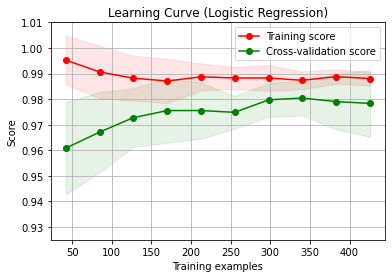

In [103]:
########################### Visualization of Learning Curves ###########################

# Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import learning_curve 
# Random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
# Logistic regression classifier class
from sklearn.linear_model import LogisticRegression
# kNN classifier class
from sklearn import neighbors
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, 
# plots some lines in a plotting area, decorates the plot with labels, etc
import matplotlib.pyplot as plt


title = "Learning Curve (Logistic Regression)"


# Class ShuffleSplit is a random permutation cross-validator
# Parameter n_splits = Number of re-shuffling & splitting iterations
# Parameter test_size = represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
# Parameter random_state = the seed used by the random number generator
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)
estimator = LogisticRegression() # Build multiple LRs as we increase the size of the traning data
# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X_norm, y, (0.925, 1.01), cv=cv, n_jobs=4)

plt.show() # Display the figure


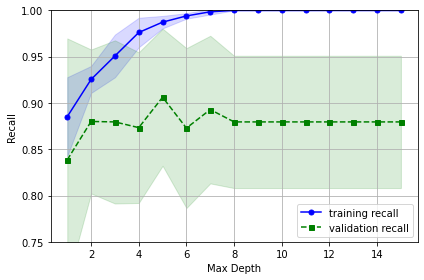

In [97]:
############################### Import Libraries & Modules #################################

# Fitting curve (aka validation curve)
# Determine training and test scores for varying parameter values.
from sklearn.model_selection import validation_curve
# Split validation
from sklearn.model_selection import train_test_split
# Class for Logistic Regression classifier
from sklearn.tree import DecisionTreeClassifier 

np.random.seed(42) #the seed used by the random number generator for np
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3,random_state=42)

############################# Parameters - Varying Complexity #############################

# Specify possible parameter values for C.
# Parameter C: Inverse of regularization strength; 
# C must be a positive float; smaller values specify stronger regularization.
param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Compute scores for an estimator with different values of a specified parameter. 
# This is similar to grid search with one parameter. 
# However, this will also compute training scores and is merely a utility for plotting the results.

########################## Estimate Scores - Varying Complexity ##########################

# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                estimator=DecisionTreeClassifier(random_state=42),
                X=X_train, 
                y=y_train, 
                param_name="max_depth", # parameter C: Inverse of regularization strength; must be a positive float. Smaller values of paramter C specify stronger regularization.
                param_range=param_range,
                cv=10,     #10-fold cross-validation
                scoring="recall", 
                n_jobs=4) # Number of CPU cores used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the ``solver``is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. If given a value of -1, all cores are used.


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training recall')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation recall')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.ylim([0.75, 1]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure

10-fold cross validation:

ROC AUC: 0.90 (+/- 0.05) [Decision Tree]
ROC AUC: 1.00 (+/- 0.01) [Logistic Regression]
ROC AUC: 0.99 (+/- 0.01) [kNN]


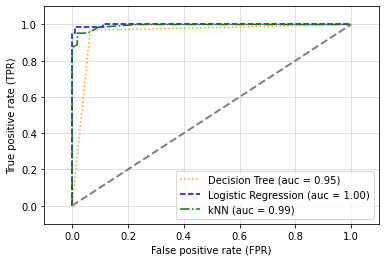

In [98]:
############################### Import Libraries & Modules #################################

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

######################################## Classifiers ########################################


# Label the classifiers
clf_labels = ['Decision Tree', 'Logistic Regression', 'kNN']
all_clf = [gs_dt.best_estimator_, gs_lr2.best_estimator_, gs_knn.best_estimator_]

#################################### Cross - Validation ####################################


print('10-fold cross validation:\n')
# Note: We are assuming here that the data is standardized. For the homework, you need to make sure the data is standardized.
for clf, label in zip([gs_dt.best_estimator_, gs_lr2.best_estimator_, gs_knn.best_estimator_], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X_norm,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()